# Assignment 1 - Simplified Custom Object Detection

This notebook contains the required task for the first assignment of the Deep Network Development course. Read the task description and fill in the empty code cells. Each section represents an implementation stage of object detection: -from loading and inspecting the dataset; -to implementing, training and evaluating a Convolutional Neural Network based architecture. The sections are there to guide you but you do not have to follow them strictly.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it, and upload the final .ipynb file to Canvas. If you are using this in Google Colab notebook, save it as .ipynb and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the .ipynb file.


## General Rules
Please check all the requirements listed on Canvas, but here are some general rules:
- From the list of objects provided, please pick at least 3 objects. You may pick more, but less than 3 is not acceptable and results in losing points;
- While we do not require a high performance model, we still expect you to have a model that performs better than "random guessing" (i.e. for 3 objects, mAP should be better than 33%);
- Copying others' code will make you fail the assignment automatically, resulting in a 0;
- Not submitting anything results in a 0;
- Submitting something, as long as it is not an empty notebook, might result in a 1;
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your name, Neptun ID, and task details below.

**Name:**  
**Neptun ID:**
**Network:**
**Objects:**

## Task description

Your task is to train your own custom object detection model and compare its performance with an existing object detection model (i.e. YOLO). For that, you need to generate a synthetic dataset to train your own custom model and fine-tune an existing one. This is a simplified version of object detection, where each image must only contain a single object.
There is no expected high performance, but **your metrics should show results better than random guessing and your loss has to decrease throughout the epochs**. We expect you to show visualizations (matplotlib, seaborn, ...) of the metrics, losses, and predictions. Use techniques to avoid overfitting such as Early stopping, and more, and save the best model while training your network.

**In order to get your grade for the assignment, you must defend it by answering questions during the designated practice time.**

## Guidelines
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

# 0. Necessary Imports
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [ ]:
# ADD YOUR CODE HERE
import torch

# 1. DATASET
For this assignment you will be using at least 3 of the [Mihály Kolodko's Mini Statues](https://www.atlasobscura.com/places/hidden-mini-statues-of-budapest).

You can find all of the objects seperately in a folder here: [Objects](https://drive.google.com/drive/folders/1QEEHye66USSWesGSVBQw1v1tk3Hr01G9?usp=sharing)

<img src='https://www.goethe.de/resources/files/jpg1201/161kolodkovojenyjkorabel-formatkey-jpg-w1920.jpg' />

### 1.1. Load objects

**Please select 3 or more objects.** Upon selecting the objects, **please remove the background, so that only the object is kept**. You can do it manually, online or by code (this is not part of the evaluation of your assignment).
As an example, the following objects have been chosen (the background was removed with Segment Anything Model):

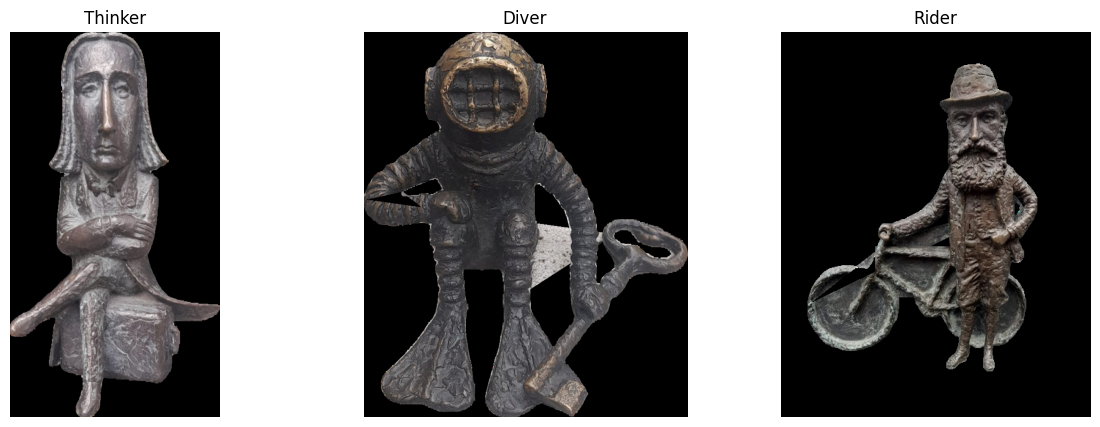

In [ ]:
# ADD YOUR CODE HERE

In [ ]:
thinker.shape, diver.shape, rider.shape

((792, 431, 3), (796, 668, 3), (525, 422, 3))

### 1.2. Load backgrounds

In order to train a custom object detection model, a dataset is needed. For this assignment, a synthetic dataset should be created by:
- Inserting an object in a random position of a background image

We want to follow a similar pattern to what Mihály Kolodko did, by inserting the objects in the streets of Budapest. **Thus, collect a few background images of different locations in Budapest.** This can be done manually or via code. The recommendation is to use icrawler to collect them.

In [ ]:
!pip install icrawler

In [ ]:
!mkdir background

In case of any error, try other crawler: from icrawler.builtin import BaiduImageCrawler, BingImageCrawler, GoogleImageCrawler

In [ ]:
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(
    parser_threads=2,
    downloader_threads=4,
    storage={'root_dir': 'background'}
)

for keyword in ['budapest', 'budapest parliament', 'buda castle', 'budapest st stephen basilica', 'budapest heroes square']:
    google_crawler.crawl(
        keyword=keyword, max_num=10, file_idx_offset='auto') #, min_size=(500, 500),)

#Some images may return an error, but icrawler tries to find other images regardless

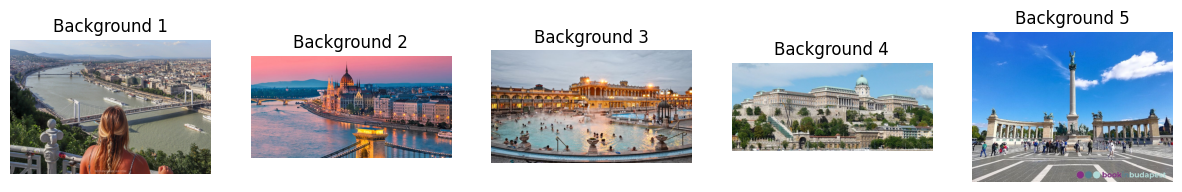

In [ ]:
directory = 'background'
#Show some of the images, to confirm that they were successfully crawled
display_sample_images(directory)

### 1.3. Create dataset

Now it is time to create a dataset. This is the first important part of evaluation of the assignment.
From the selected objects and collected background images, do the following:
- Randomly select background images
- For each background image insert only 1 of the 3 select objects
- The object should be inserted at a random location
- Save the coordinates where the object was placed and create a bounding box from them. i.e. if the object with height h and width w was placed at position x,y, then the bounding box should be in the format [x,y,w,h] or [x1,y1,x2,y2] where x2=x1+w and y2=y1+h
- If you plan to compare your own custom model with a YOLO model, then use the YOLO format [((x+w/2)/image width), (x+y/2)/image height, w/image width, h/image height], where image is the background
- You may want to save the generated dataset, as it will be used later to train the custom model as well as fine-tune an existing one
- Wrap everything under a PyTorch Dataset class
- Create train, val and test sets

In [ ]:
# ADD YOUR CODE HERE

#This my own function... It creates and saves a dataset in the following format:
# root/
#     dataset/
#             train/
#                   images/
#                         00001.jpg
#                   labels/
#                         00001.txt with the content [class yolo_x, yolo_y, yolo_w, yolo_h] following the yolo format
#             val
#...
createDataset('dataset', 'background', split='train', img_size=(640,640), num_images=5000)
createDataset('dataset', 'background', split='val', img_size=(640,640), num_images=1000)
createDataset('dataset', 'background', split='test', img_size=(640,640), num_images=200)

In [ ]:
# ADD YOUR CODE HERE

class ObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, split='train', num_classes=3, transform=None):
        self.root_dir = root_dir
        self.split_dir = os.path.join(root_dir, split)
        self.image_dir = os.path.join(self.split_dir, 'images')
        self.label_dir = os.path.join(self.split_dir, 'labels')
        self.image_filenames = sorted(os.listdir(self.image_dir))
        self.transform = transform
        self.num_classes = num_classes

    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass

        if self.transform:
            pass

        return image, torch.tensor(category), torch.tensor(bbox) #generous hint

In [ ]:
root_dir = 'dataset'
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = ObjectDetectionDataset(root_dir, split='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)

val_dataset = ObjectDetectionDataset(root_dir, split='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4, pin_memory=True)


test_dataset = ObjectDetectionDataset(root_dir, split='test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4, pin_memory=True)

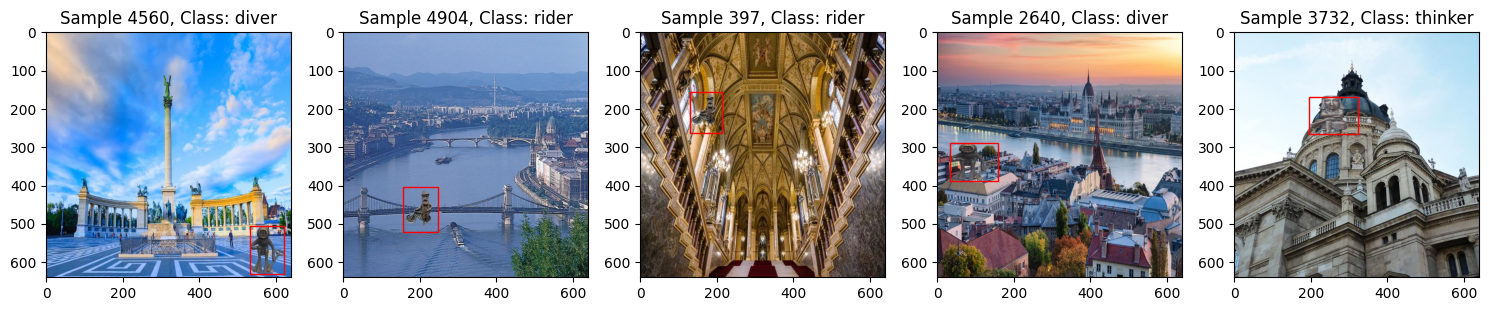

In [ ]:
# ADD YOUR CODE HERE

# Show some visualizations of the created dataset
visualize_dataset(train_dataset)

# 2. MODELS
For this assignment, you are required to create your own custom object detection model and compare its performance with an existing object detection model.

### 2.1. Custom Object Detection model

Create a Convolutional Neural Network based architecture that contains a backbone for feature extraction and two ouput branches:
- one for class probabilities (same size as the number of objects chosen, i.e. 3)
- another for bounding box regression (of size 4, due to the box coordinates x,y,w,h) or the chosen format

This is the main evaluation part of the assignment. Try combining different layers, try different hyper-parameters and include regularization.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# ADD YOUR CODE HERE

class CustomModel(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomModel, self).__init__()

        # Define custom backbone

        # Detection layers

    def forward(self, x):
        #...
        return class_probs, bbox_regression

In [ ]:
dummy_image = torch.randn(1, 3, 640, 640).to(device)
num_classes = 3

model = CustomModel(num_classes).to(device)
cls_output, bbox_output = model(dummy_image)

print("Class Output Shape:", cls_output.shape)
print("Bounding Box Output Shape:", bbox_output.shape)

Class Output Shape: torch.Size([1, 3])
Bounding Box Output Shape: torch.Size([1, 4])


### 2.2. Train your model
Pay attention to your choices. Define an optimizer, a loss function, the number of epochs and regularization techniques.
Make sure to optimize both classification and bounding box regression losses.
Be aware of overfitting and underfitting. Make sure the loss is decreasing over the epochs. Save the losses so that they can be visualized.

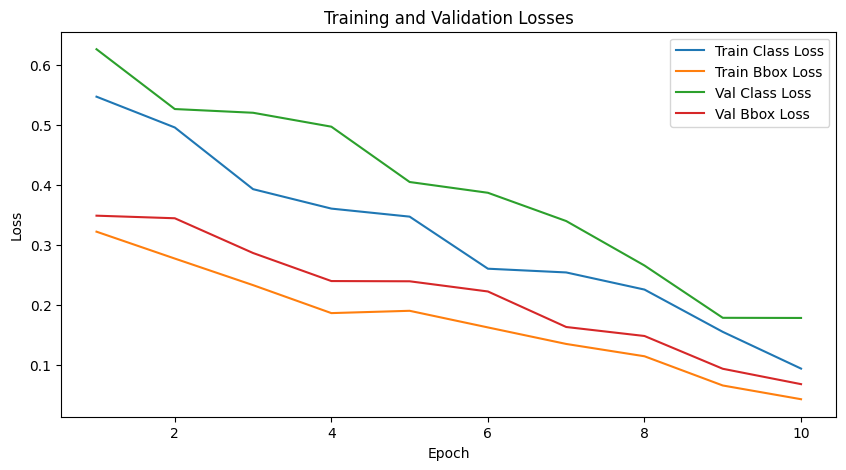

In [ ]:
# ADD YOUR CODE HERE

train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, class_loss_fn, bbox_loss_fn, num_epochs=10)
plot_losses(train_losses, val_losses)
# DO NOT TRY TO REPLICATE... this is an example

### 2.3. Evaulate and do inference with the trained custom model

Choose at least 3 metrics to evaluate your model (i.e. Precision, Recall, F-1, mean Average Precision, ...). Additionally, you can check the: inference speed, number of parameters, model size, etc.

Show performance metric visualizations.

Show some predictions of your trained model.

In [ ]:
# ADD YOUR CODE HERE

precision, recall, mAP = evaluate_test_set(model, test_loader, device)
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, mAP: {mAP:.4f}')

In [ ]:
# ADD YOUR CODE HERE

visualize_predictions(model, test_dataset)

### 2.4. Load an existing object detection model
We recommend using YOLOv8, but you are free to use anything else (PyTorch based).

In [ ]:
# ADD YOUR CODE HERE

### 2.5. Fine-tune the existing object detection model
If YOLO is chosen, this can be done relatively easy by providing a data.yaml file (which follows a specific format, check github) and running the train script:

i.e. !yolo task=detect mode=train data=datasets/data.yaml model=yolov8n.yaml epochs=200 imgsz=640

or the functional way:
result = yolo.train(data = data_yaml_path, epochs = 40, batch = 10, patience = 30, weight_decay = 0.0005, project = save_path, name = 'train')

Make sure to show the losses and metrics visualizations. By default, YOLO should verbose those.

In [ ]:
# ADD YOUR CODE HERE

### 2.6 Evaluate the existing object detection model
Use the same metrics chosen on step 2.3.

In [ ]:
# ADD YOUR CODE HERE

# 3. COMPARISON
Compare the performance of the two models. Show some visualizations of predictions from both models. Justify their differences. How would you improve your own custom model?

In [ ]:
# ADD YOUR CODE HERE